[1, 1.0, 19.0, 0.2355928214753657]
[2, 2.0, 18.0, 0.42151707785286757]
[3, 3.0, 17.0, 0.6173948400220799]
[4, 4.0, 16.0, 0.8025170738529147]
[5, 5.0, 15.0, 0.9761391812288235]
[6, 6.0, 14.0, 1.1373947443113137]
[7, 7.0, 13.0, 1.2852640590342634]
[8, 8.0, 12.0, 1.4185312444020604]
[9, 9.0, 11.0, 1.535724418442107]
[10, 10.0, 10.0, 1.635030012678535]
[11, 11.0, 9.0, 1.7141662018657515]
[12, 12.0, 8.0, 1.7701890357152235]
[13, 13.0, 7.0, 1.799182401068292]
[14, 14.0, 6.0, 1.7957357444334472]
[15, 15.0, 5.0, 1.7520066674529196]
[16, 16.0, 4.0, 1.6559022611074543]
[17, 17.0, 3.0, 1.4872043668014543]
[18, 18.0, 2.0, 1.2084832693217296]
[19, 19.0, 1.0, 0.7446284920194368]


(-24.0, 1.0)

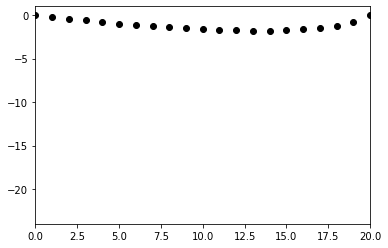

In [41]:
from sympy import *
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

import math


#laa, lbb, dd = symbols('laa, lbb, dd')
L=20            # [m] total length of line
W=70             # [kg] weight of slacker
W=9.81*W          # [N] conversion to Newtons
T=800           # [N] tension in unweighted line
c = 0.00001          # [1/N] stretch constant
k = L * 0.10 / T
nodes = 21       # [-] number of locations sag calc'd at


la_list = np.linspace(0,L,nodes).tolist()
sag = [0] * len(la_list)

#print(la_list)
#print(sag)


def equations(vars, params):
    laa, lbb, dd = vars
    la, lb = params
    
    eq1 = laa**2 - la**2 - dd**2
    eq2 = ((((laa/la)-1)/c)+T)*dd/laa + ((((lbb/lb)-1)/c)+T)*dd/lbb - W
    eq3 = ((((laa/la)-1)/c)+T)*la/laa - ((((lbb/lb)-1)/c)+T)*lb/lbb
    
    # eq1 = (laa**2 - dd**2)**0.5 - la
    # eq2 = (T*dd + dd*(laa - la)/k)/laa + (T*dd + dd*(lbb - lb)/k)/lbb - W
    # eq3 = (T*la + la*(laa - la)/k)/laa - (T*lb + lb*(lbb - lb)/k)/lbb
   
    return [eq1, eq2, eq3]
    
        
for i in range(1,nodes-1):
    la = la_list[i]
    lb = L-la
    params = [la, lb]
    
    sol = fsolve(equations, (la, lb, 0), params)
    #print(sol)
    laa, lbb, dd = sol
    sag[i]=-dd
    print([i] +params+[dd])
    

#print(la_list)
#print(sag)


plt.plot(la_list, sag, 'o', color='black')
plt.xlim(0, L)
plt.ylim(-L*1.2, 1)

